In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
loan.dropna(axis=0, inplace=True)
loan_target = loan.loc[:, 'Loan_Status'].values
loan.drop(['Loan_ID', 'Loan_Status'], axis=1, inplace=True)
loan.shape

(480, 11)

In [3]:
#Standardizing the variables
loan_encode = loan.apply(LabelEncoder().fit_transform)  #encoding multiple cols
print(loan_encode.head())
loan_std = StandardScaler().fit_transform(loan_encode)

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          0              0              247   
2       1        1           0          0              1              112   
3       1        1           0          1              0               74   
4       1        0           0          0              0              305   
5       1        1           2          0              1              281   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1                 50          76                 7               1   
2                  0          23                 7               1   
3                135          68                 7               1   
4                  0          89                 7               1   
5                196         159                 7               1   

   Property_Area  
1              0  
2              2  
3              2  
4              2  
5              2  


In [38]:
pca = PCA()
principalComponents = pca.fit_transform(loan_std)
print("\nEigen vectors shape\n", pca.components_.shape)
print(pca.n_components_)
print(pca.singular_values_)


Eigen vectors shape
 (11, 11)
11
[31.00846689 27.46510574 24.72964293 22.92895846 22.00606867 21.21428343
 20.33428602 19.27568052 18.2503185  15.94338824 10.96525835]


In [34]:
principalDf = pd.DataFrame(data = principalComponents, columns=["PC%i"% x for x in range(pca.components_.shape[0])])
principalDf

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.723221,0.065663,-0.281580,0.016291,-1.133312,-0.483674,0.401494,0.571381,-0.707782,-0.494804,0.280876
1,-0.590865,-0.108527,0.892920,-0.723271,0.327984,1.326071,-2.717480,0.410464,-1.007674,-0.773901,-0.255386
2,-0.642882,-2.040979,-0.393209,-0.017901,-0.188949,0.407482,-0.850604,-1.553286,1.092072,-0.455999,0.071806
3,-0.574268,1.240545,0.174094,-1.269515,0.356371,0.170840,0.236575,-1.463894,-0.633646,0.449638,-0.082991
4,2.913075,0.420702,-0.331255,-0.253244,0.909768,1.331228,-1.977858,0.069348,0.999336,0.916463,-0.038068
...,...,...,...,...,...,...,...,...,...,...,...
475,-2.744693,1.199911,-0.352135,0.287265,-0.821544,-0.237423,0.528868,1.497498,0.131361,-0.034441,-0.094852
476,0.567951,-1.345810,2.208406,-0.173835,-0.880381,0.172159,1.616168,2.210930,-1.100777,0.454679,0.640502
477,1.625098,0.825671,0.357917,-1.554274,0.323601,-0.382564,0.203923,-1.080082,0.302648,-0.531111,-0.548303
478,1.640842,0.438224,0.871389,-1.715657,0.175745,-0.753787,0.056228,-0.542836,0.275638,0.042977,-0.186668


In [159]:
eig_value = pca.explained_variance_
print("\n\n1. Amount of variance explained by each PC, eigen values:\n", eig_value)
var_exp = pca.explained_variance_ratio_ 
print("\n\n2. % of Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp)
print("\n\n3. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n4. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n5. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))




1. Amount of variance explained by each PC, eigen values:
 [2.00735912 1.57480592 1.27673328 1.09757231 1.01099595 0.93955286
 0.86322169 0.77568238 0.69535308 0.53067146 0.25101647]


2. % of Variance Explained
 [0.18210701 0.14286592 0.11582486 0.09957143 0.09171725 0.08523595
 0.07831121 0.07036967 0.06308222 0.04814235 0.02277214]


3. Cumulative Variance Explained
 [0.18210701 0.32497293 0.44079778 0.54036921 0.63208646 0.71732241
 0.79563362 0.86600329 0.92908551 0.97722786 1.        ]


4. Percentage of variance the first two principal components each contain
  [0.18210701 0.14286592]


5. Percentage of variance the first two principal components together contain
 0.32497292653367665


Text(0, 0.5, 'Cum Proportion of Variance Explained')

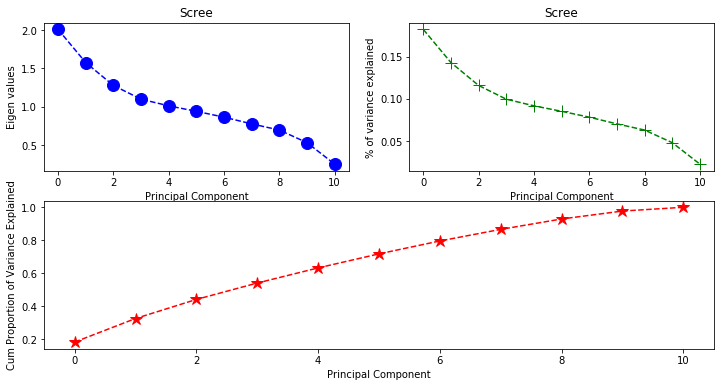

In [161]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(pca.explained_variance_, 'bo', linestyle='dashed', markersize=12)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Eigen values")
ax1.set_title("Scree")

ax2 = fig.add_subplot(2,2,2)
ax2.plot(pca.explained_variance_ratio_, 'g+', linestyle='dashed', markersize=12)
ax2.set_xlabel("Principal Component")
ax2.set_ylabel("% of variance explained")
ax2.set_title("Scree")

ax3 = fig.add_subplot(2,1,2)
ax3.plot(cum_var_exp, 'r*', linestyle='dashed', markersize=12)
ax3.set_xlabel("Principal Component")
ax3.set_ylabel("Cum Proportion of Variance Explained")

In [160]:
X = PCA(n_components=2).fit_transform(loan_std)
loanDf = pd.DataFrame(data = X
             , columns = ['principal component 1', 'principal component 2'])
loantgt = pd.DataFrame(data= loan_target, columns=['Loan_Status'])
loan_final = pd.concat([loanDf, loantgt], axis=1)
loan_final.head()

,principal component 1,principal component 2,Loan_Status
0,0.723221,0.065663,N
1,-0.590865,-0.108527,Y
2,-0.642882,-2.040979,Y
3,-0.574268,1.240545,Y
4,2.913075,0.420702,Y


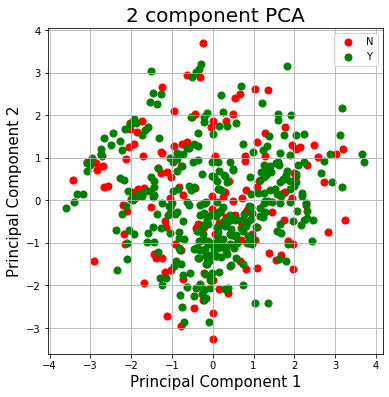

In [94]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'Y']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = loan_final['Loan_Status'] == target
    ax.scatter(loan_final.loc[indicesToKeep, 'principal component 1']
               , loan_final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

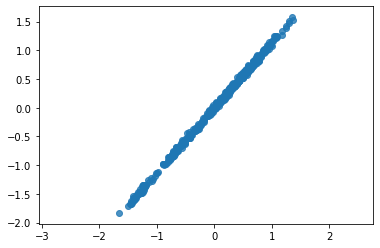

In [185]:
X_new = pca.inverse_transform(X)
#plt.scatter(loan.loc[:, 'Gender'], loan.loc[:, 'LoanAmount'], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [46]:
pca.singular_values_

array([31.00846689, 27.46510574, 24.72964293, 22.92895846, 22.00606867,
       21.21428343, 20.33428602, 19.27568052, 18.2503185 , 15.94338824,
       10.96525835])

In [56]:
pca.explained_variance_

array([2.00735912, 1.57480592, 1.27673328, 1.09757231, 1.01099595,
       0.93955286, 0.86322169, 0.77568238, 0.69535308, 0.53067146,
       0.25101647])

In [42]:
pca.components_

array([[ 3.68227228e-01,  4.31704839e-01,  3.91735590e-01,
        -1.38357345e-01,  1.73042222e-01,  3.79225818e-01,
         2.15839094e-01,  5.25140239e-01, -4.92016765e-02,
         7.93179931e-03, -8.27150377e-02],
       [-3.59446027e-01, -3.87423167e-01, -1.87870796e-01,
        -3.07533243e-01,  2.64167018e-01,  5.27385549e-01,
        -2.86802723e-01,  2.80089018e-01,  2.46201030e-01,
         4.75406815e-02, -1.39029704e-01],
       [-9.95770283e-03,  4.31832483e-02,  3.71320165e-01,
         3.38035462e-01,  2.42026970e-01,  2.42744977e-01,
        -6.27345796e-01, -2.22694843e-01, -3.91609755e-01,
        -5.32446881e-02,  1.70406271e-01],
       [-1.15962816e-02, -1.42317242e-01, -1.05436942e-01,
         4.67352507e-01,  3.07635139e-01, -4.62839537e-02,
         1.86945608e-01,  8.47413960e-02, -9.66881112e-02,
        -4.82978677e-01, -6.07081275e-01],
       [-1.31766644e-01, -5.43629242e-02, -7.78304689e-02,
        -2.70567803e-01,  8.16823969e-02, -1.13803757e-03,
  